# Overview of Scikit-Learn #

The [main page](https://scikit-learn.org/stable/index.html) is a great place to start, and leads to the [supervised learning page](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning).  See also the [User Guide page](https://scikit-learn.org/stable/user_guide.html), which has a great list of major categories.  The [API Reference](https://scikit-learn.org/stable/modules/classes.html) is not as organized.

**Datasets:**

+ For playing, SKLearn has many [built-in datasets](https://scikit-learn.org/stable/datasets.html), toy, real-world, and generated.
+ You can also [generate your own datasets](https://scikit-learn.org/stable/datasets/sample_generators.html)

**Classification Techniques:**

  Note the familiar classifiers:

+ [Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html#sklearn.linear_model.Perceptron)
+ [SVM Classifier](https://scikit-learn.org/stable/modules/svm.html#classification)
+ [k Nearest Neighbors](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification)
+ [Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html)
+ [Decision Trees](https://scikit-learn.org/stable/modules/tree.html)
+ [Logistic Regression](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)


**Other Features:**

+ [Visualizations](https://scikit-learn.org/stable/visualizations.html#visualizations)--devoted to different ways of visualizing models and outcomes
+ [Decision Boundary Display](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html#sklearn.inspection.DecisionBoundaryDisplay)--an example of the previous
+ [Feature Extracting](https://scikit-learn.org/stable/modules/feature_extraction.html)--this section has a part devoted to text and another part devoted to image features (the second of which isn't so interesting). 
+ [Metrics](https://scikit-learn.org/stable/modules/model_evaluation.html)--measuring success of the model

# SVM Examples #

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Train Data Construction ##

In [38]:
first = np.random.multivariate_normal([1.8,1.8],[[1,0],[0,1]], 30)
second = np.random.multivariate_normal([-1.8,-1.8],[[1,0],[0,1]], 70)

In [39]:
num1 = np.append(first, np.ones([30,1],dtype=int), axis=1)
num0 = np.append(second,np.zeros([70,1],dtype=int), axis=1)

In [40]:
traindata = np.vstack((num1,num0))

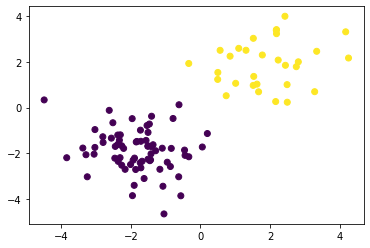

In [42]:
plt.scatter(traindata[:,0], traindata[:,1], c = traindata[:,2])
plt.savefig("myscatter.png", format="png")
plt.show()

## A close-up of the data boundary ##

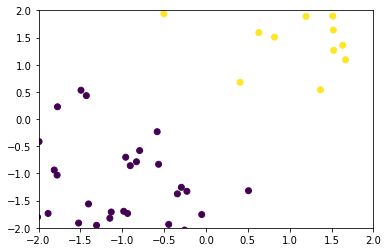

In [43]:
plt.scatter(mydata[:,0], mydata[:,1], c = mydata[:,2])
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.savefig("myscatter2.png", format="png")
plt.show()

In [44]:
traindata[:5,:]

array([[2.81361959, 1.99622811, 1.        ],
       [3.2834958 , 0.69371363, 1.        ],
       [0.85131006, 2.2420503 , 1.        ],
       [1.67120659, 0.68869411, 1.        ],
       [2.49610535, 0.23438094, 1.        ]])

In [47]:
traindata.shape

(100, 3)

In [56]:
trainX = traindata[:,0:2]

In [57]:
trainy = traindata[:,2]

## Test Data Construction ##

**Idea:**  Sophisticated models can *overfit* the data sets they are trained on.  We compare with a test data set to see how it performs on *new* data drawn from the same distribution.

In [49]:
first = np.random.multivariate_normal([1.8,1.8],[[1,0],[0,1]], 30)
second = np.random.multivariate_normal([-1.8,-1.8],[[1,0],[0,1]], 70)

In [50]:
num1 = np.append(first, np.ones([30,1],dtype=int), axis=1)
num0 = np.append(second,np.zeros([70,1],dtype=int), axis=1)

In [51]:
testdata = np.vstack((num1,num0))

In [59]:
testX = testdata[:,0:2]

In [60]:
testy = testdata[:,2]

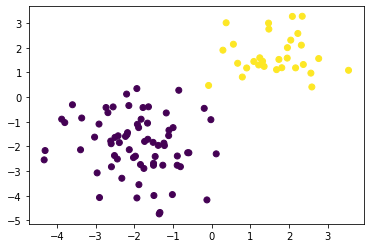

In [61]:
plt.scatter(testdata[:,0], testdata[:,1], c = testdata[:,2])
plt.savefig("myscatter.png", format="png")
plt.show()

## The SVM Model ##

In [53]:
from sklearn.svm import SVC

In [64]:
mysvc1 = SVC()

In [65]:
mymodel1 = mysvc1.fit(trainX, trainy)

In [68]:
model1out = mymodel1.predict(testX)

In [69]:
model1out - testy

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## Built-in Accuracy Measurement ##

In [70]:
from sklearn.metrics import accuracy_score

In [72]:
accuracy_score(model1out, testy)

1.0

## Some Interesting Datasets ##

sklearn has methods for generating interesting datasets.  See the "Samples Generator" of the [datasets section](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets) of the SKLearn documentation. 

In [73]:
from sklearn.datasets import make_moons

In [75]:
myX, myy = make_moons(100)

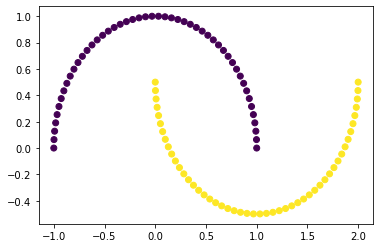

In [77]:
plt.scatter(x = myX[:,0], y = myX[:,1], c = myy)
plt.show()

In [88]:
myX, myy = make_moons(150, noise=.2)

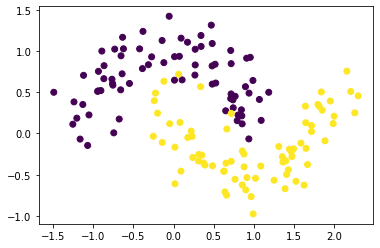

In [89]:
plt.scatter(x = myX[:,0], y = myX[:,1], c = myy)
plt.show()

### Creating Train and Test Datasets ###

SKLearn has a method for [creating a train-test split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) in the data.

In [90]:
from sklearn.model_selection import train_test_split

In [94]:
newtrainX, newtestX, newtrainy, newtesty = train_test_split(myX, myy, test_size=.3)

In [96]:
mymodel2 = mysvc1.fit(newtrainX, newtrainy)

In [97]:
predict2 = mymodel2.predict(newtestX)

In [98]:
predict2

array([1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1])

In [99]:
accuracy_score(predict2, newtesty)

0.9777777777777777